## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5, 10, 25]

In [7]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

results = {}

for patience in PATIENCE:
    earlystop = EarlyStopping(monitor="val_acc", 
                          patience=patience, 
                          verbose=1
                          )
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "patience-%s" % str(patience)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

50000/50000 [==============================] - 6s 112us/step - loss: 2.2007 - acc: 0.2751 - val_loss: 2.0589 - val_acc: 0.3147
Epoch 2/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.7479 - acc: 0.3936 - val_loss: 1.8205 - val_acc: 0.3755
Epoch 3/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.6166 - acc: 0.4373 - val_loss: 1.6860 - val_acc: 0.4110
Epoch 4/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5426 - acc: 0.4603 - val_loss: 1.6477 - val_acc: 0.4231
Epoch 5/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4859 - acc: 0.4830 - val_loss: 1.6086 - val_acc: 0.4318
Epoch 6/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.4394 - acc: 0.4991 - val_loss: 1.5665 - val_acc: 0.4503
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.4016 - acc: 0.5139 - val_loss: 1.5578 - val_acc: 0.4494
Epoch 8/50
50000/50000 [===========================

50000/50000 [==============================] - 5s 98us/step - loss: 1.4750 - acc: 0.4863 - val_loss: 1.5870 - val_acc: 0.4422
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4315 - acc: 0.5024 - val_loss: 1.5600 - val_acc: 0.4520
Epoch 7/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3925 - acc: 0.5152 - val_loss: 1.5406 - val_acc: 0.4606
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3585 - acc: 0.5270 - val_loss: 1.5222 - val_acc: 0.4628
Epoch 9/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3278 - acc: 0.5383 - val_loss: 1.5101 - val_acc: 0.4683
Epoch 10/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2966 - acc: 0.5499 - val_loss: 1.4992 - val_acc: 0.4753
Epoch 11/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.2679 - acc: 0.5607 - val_loss: 1.4867 - val_acc: 0.4739
Epoch 12/50
50000/50000 [=====================

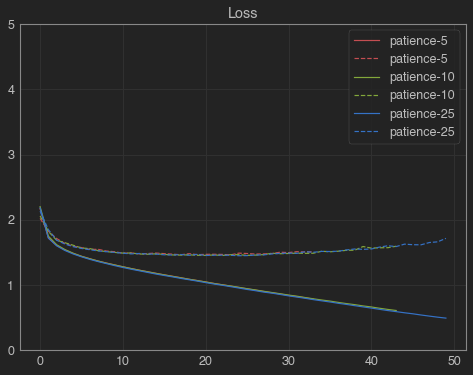

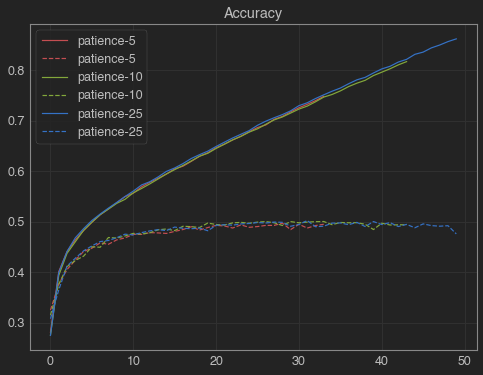

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()
fig.savefig("ES_loss.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
fig.savefig("ES_acc.png", bbox_inches='tight', dpi=300)